## Preprocess and Explore the Data

Extract historical financial data from **yfinance** for Portfolio Analysis:
- **TSLA** provides potential high returns with high volatility.
- **BND** contributes stability and low risk.
- **SPY** offers diversified, moderate-risk market exposure.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [2]:
# Import custom module from data_processor
from data_processor import DataProcessor

In [3]:
# Instantiate the DataProcessor class
processor = DataProcessor()

#####  Load yfinance historical data for Tiker symbol [`TSLA`, `BND`, `SPY`]

In [4]:
# Define the stock symbols
symbols = ['TSLA', 'BND', 'SPY']
# Define the start and end dates for data fetching
start_date = '2015-01-01'
end_date = '2025-10-31'

In [5]:
# Fetch the data for the specified symbols and date range
data = processor.get_data(symbols, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Data Cleaning

In [9]:
# Clean the data
cleaned_data = processor.clean_data()

e:\Kiffya_10_acc\Week 11\GMF-Portfolio-Optimization\scripts\data_processor.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
e:\Kiffya_10_acc\Week 11\GMF-Portfolio-Optimization\scripts\data_processor.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
e:\Kiffya_10_acc\Week 11\GMF-Portfolio-Optimization\scripts\data_processor.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


#### Basic Statistics

In [10]:
# Display basic statistics
stats = processor.basic_statistics()
for symbol, stat in stats.items():
    print(f"\nBasic statistics for {symbol}:\n", stat)


Basic statistics for TSLA:
 Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965   111.438965   113.895836   108.869421   111.461872   
std      110.120450   110.120450   112.643277   107.541830   110.208156   
min        9.578000     9.578000    10.331333     9.403333     9.488000   
25%       17.066167    17.066167    17.368167    16.790167    17.058499   
50%       25.043000    25.043000    25.279000    24.462334    24.986667   
75%      216.865002   216.865002   221.910004   212.084999   217.264999   
max      409.970001   409.970001   414.496674   405.666656   411.470001   

Price         Volume  
Ticker          TSLA  
count   2.474000e+03  
mean    1.125745e+08  
std     7.449619e+07  
min     1.062000e+07  
25%     6.682590e+07  
50%     9.289395e+07  
75%     1.301899e+08  
max     9.140

In [10]:
# Display basic statistics for each asset
for asset, df in data.items():
    print(f"\nBasic statistics for {asset}:")
    print(df.describe())


Basic statistics for TSLA:
Price         index    Adj Close        Close         High          Low  \
Ticker                      TSLA         TSLA         TSLA         TSLA   
count   1216.000000  1216.000000  1216.000000  1216.000000  1216.000000   
mean     607.500000   208.179827   208.179827   212.879994   203.276836   
std      351.173272    79.040640    79.040640    80.788012    77.352572   
min        0.000000    24.081333    24.081333    26.990667    23.367332   
25%      303.750000   172.492504   172.492504   175.564995   167.954994   
50%      607.500000   218.469994   218.469994   222.775002   213.348335   
75%      911.250000   255.984993   255.984993   260.320000   250.347504   
max     1215.000000   409.970001   409.970001   414.496674   405.666656   

Price          Open        Volume  
Ticker         TSLA          TSLA  
count   1216.000000  1.216000e+03  
mean     208.234277  1.265253e+08  
std       79.213534  8.300316e+07  
min       24.980000  2.940180e+07  
25%  

#### Exploratory Data Analysis (EDA)

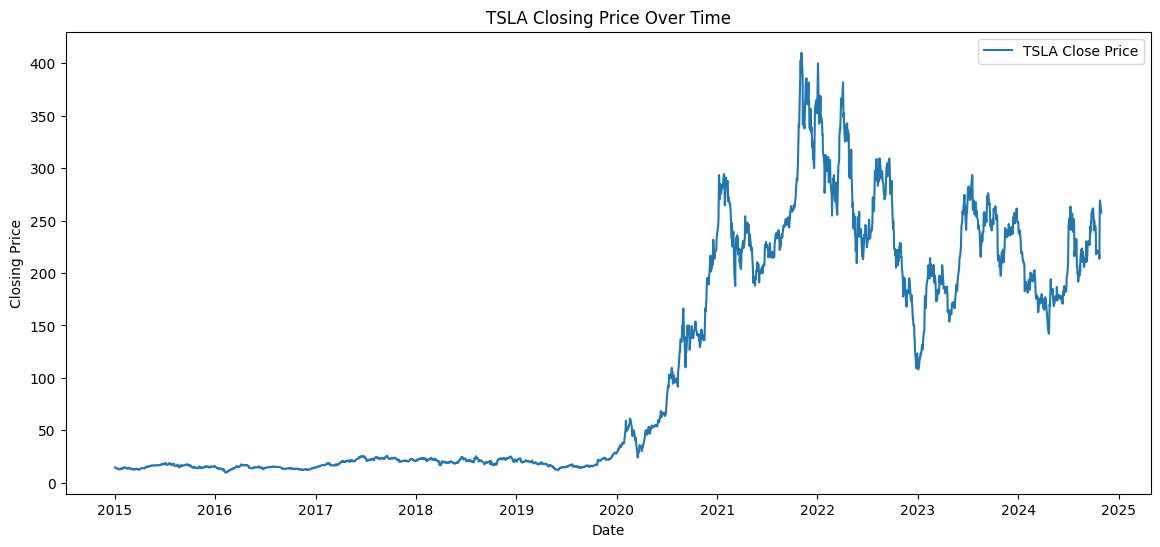

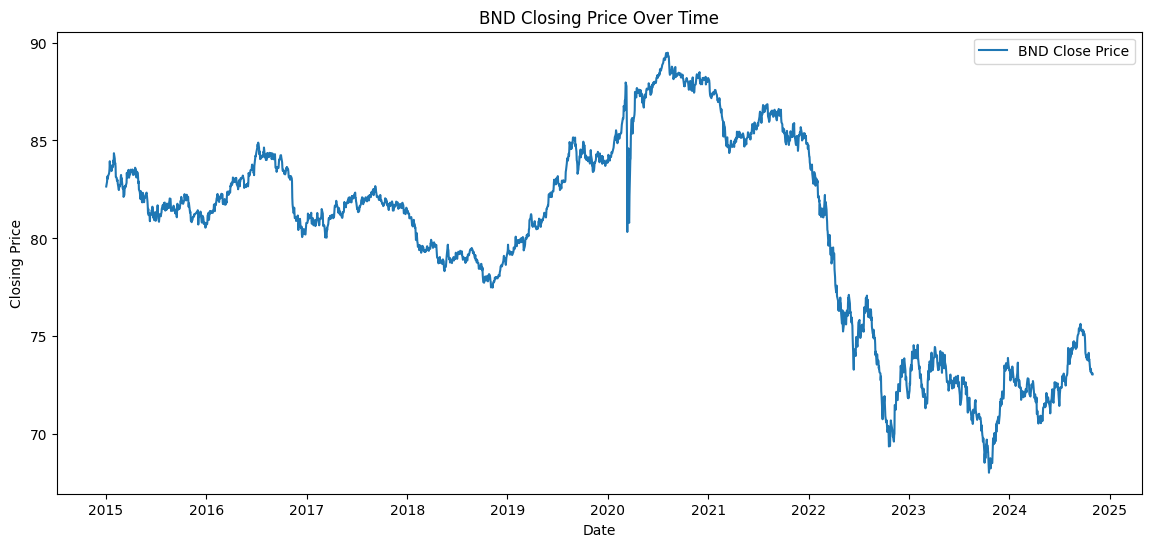

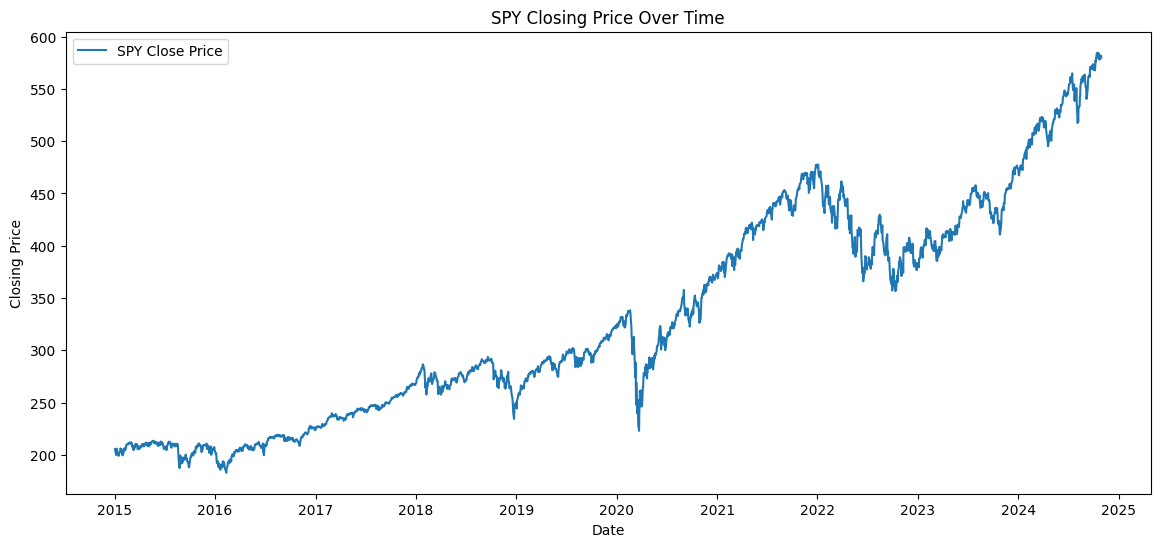

In [ ]:
# Plot closing prices over time
processor.plot_closing_prices()

#### Daily Percentage Change

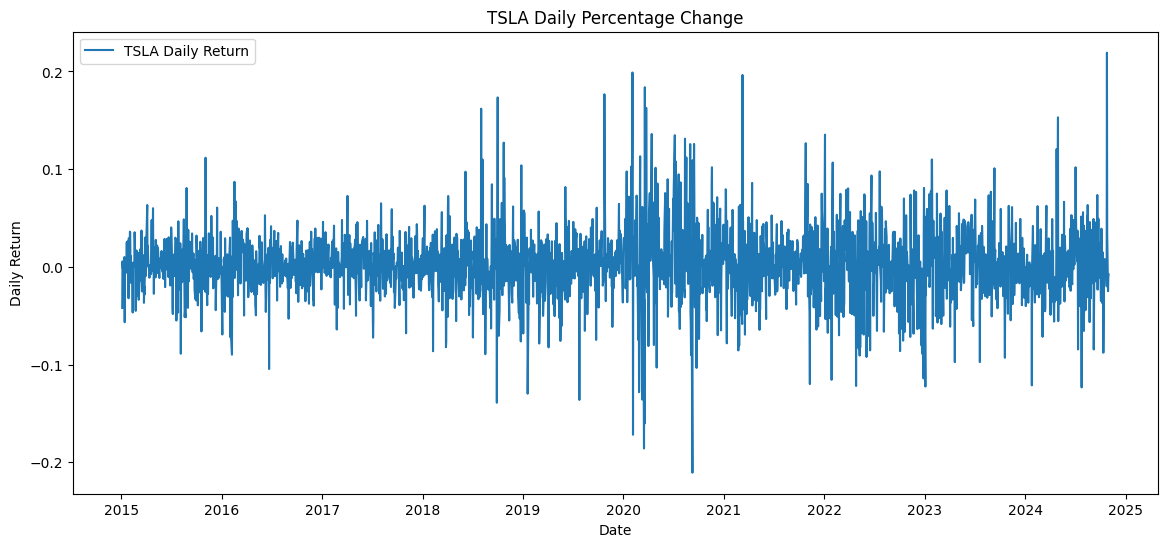

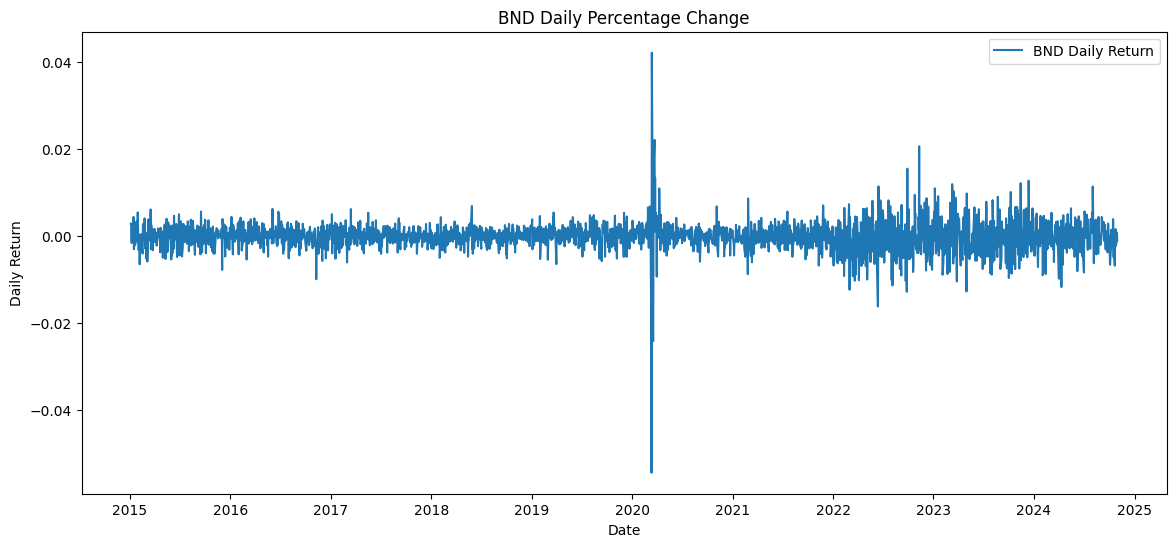

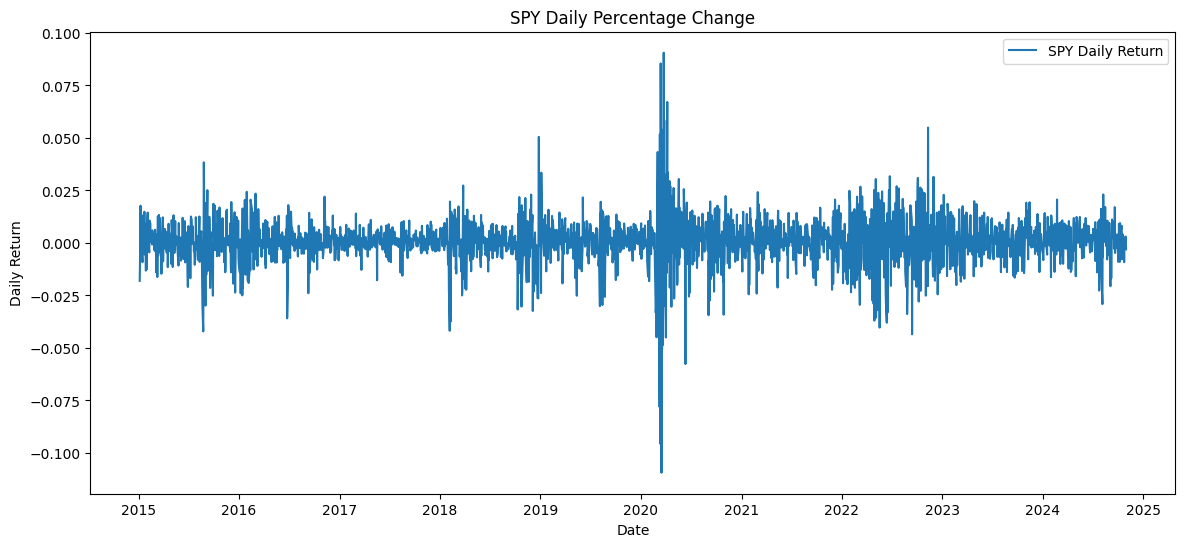

In [12]:
# Calculate and plot daily returns
daily_returns_data = processor.calculate_daily_returns()
processor.plot_daily_returns()

#### Calculating Rolling Means

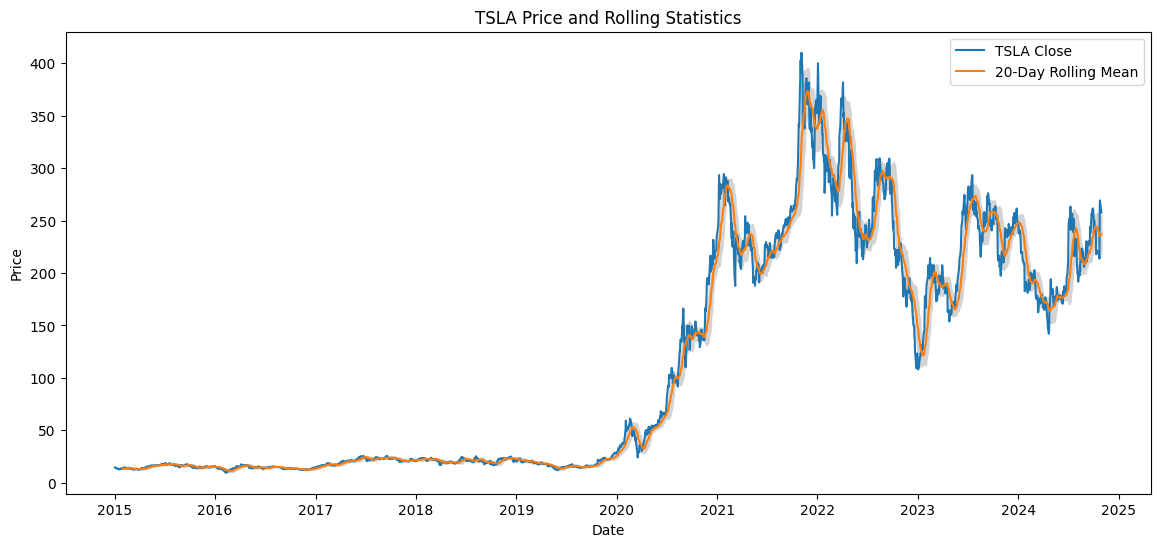

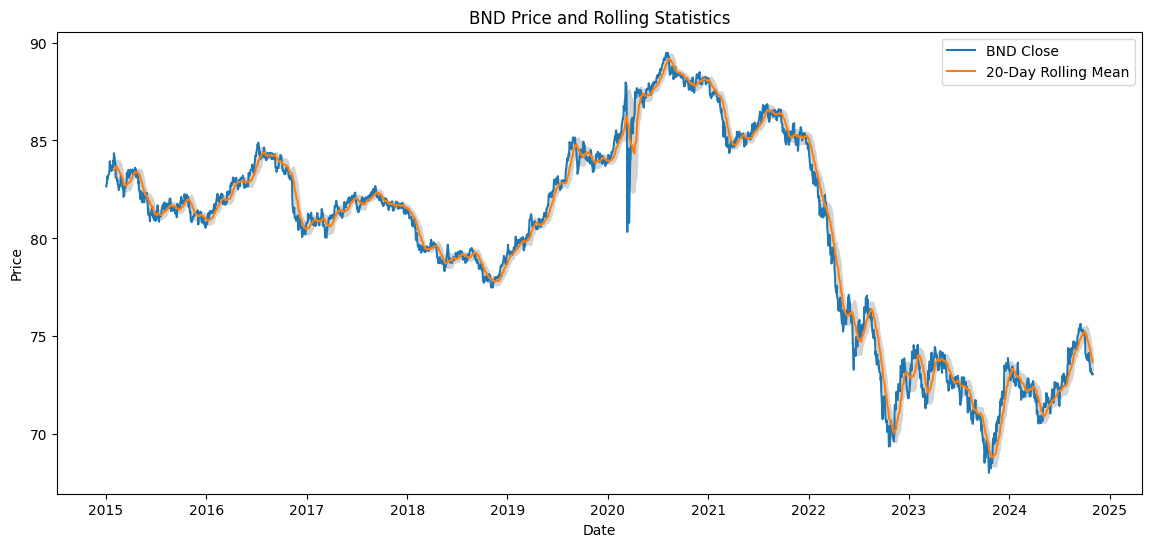

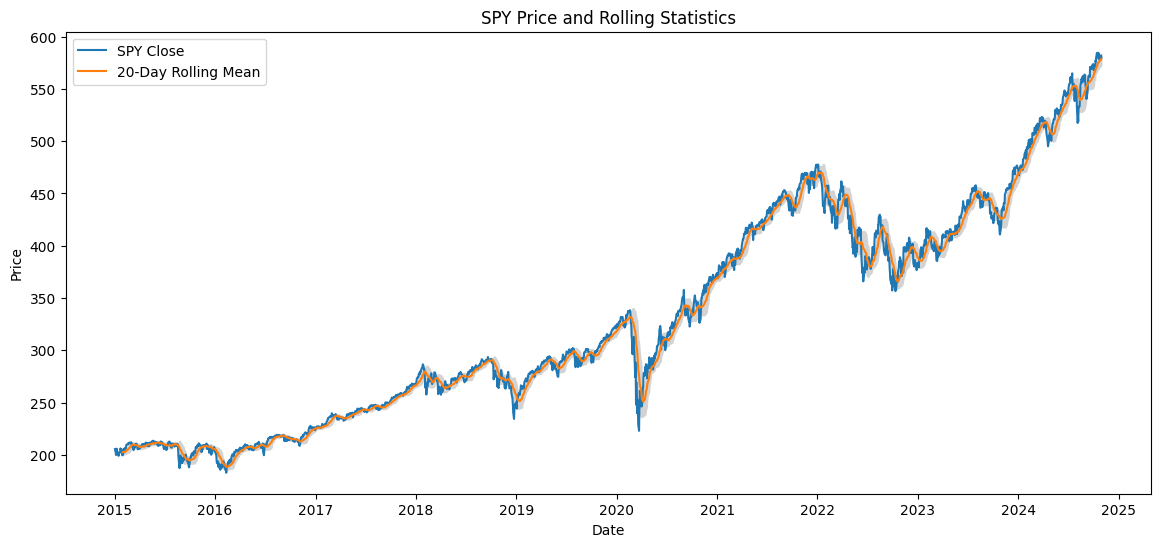

In [13]:
# Calculate and plot rolling statistics
rolling_stats_data = processor.calculate_rolling_stats()
processor.plot_rolling_stats()

**Key Summery**:
- These analyses reveal that TSLA is highly volatile, which could lead to large gains or losses, while BND provides low volatility and stability, and SPY offers a balanced risk profile with market-wide exposure. 
- This diversified mix could be beneficial in a portfolio to manage risk and capitalize on growth opportunities.

#### Outlier Detection

In [14]:
# Detect and print outliers
outliers = processor.detect_outliers()
for symbol, outlier_df in outliers.items():
    print(f"\nOutliers for {symbol}:\n", outlier_df[['Date', 'Daily Return']])


Outliers for TSLA:
 Price                       Date Daily Return
Ticker                                       
21     2020-02-03 00:00:00+00:00     0.198949
22     2020-02-04 00:00:00+00:00     0.137256
23     2020-02-05 00:00:00+00:00    -0.171758
38     2020-02-27 00:00:00+00:00    -0.128146
45     2020-03-09 00:00:00+00:00    -0.135725
50     2020-03-16 00:00:00+00:00    -0.185778
52     2020-03-18 00:00:00+00:00    -0.160344
53     2020-03-19 00:00:00+00:00     0.183877
56     2020-03-24 00:00:00+00:00     0.162817
69     2020-04-13 00:00:00+00:00     0.136038
127    2020-07-06 00:00:00+00:00     0.134794
154    2020-08-12 00:00:00+00:00     0.131236
172    2020-09-08 00:00:00+00:00    -0.210628
297    2021-03-09 00:00:00+00:00     0.196412
505    2022-01-03 00:00:00+00:00     0.135317
1087   2024-04-29 00:00:00+00:00     0.153069
1211   2024-10-24 00:00:00+00:00     0.219190

Outliers for BND:
 Price                       Date Daily Return
Ticker                                 

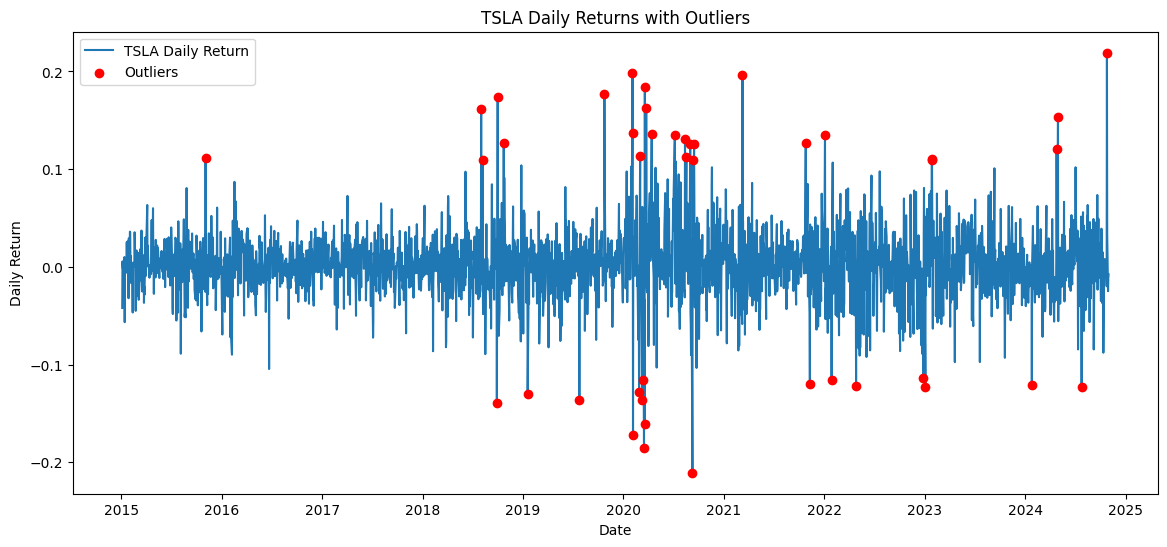

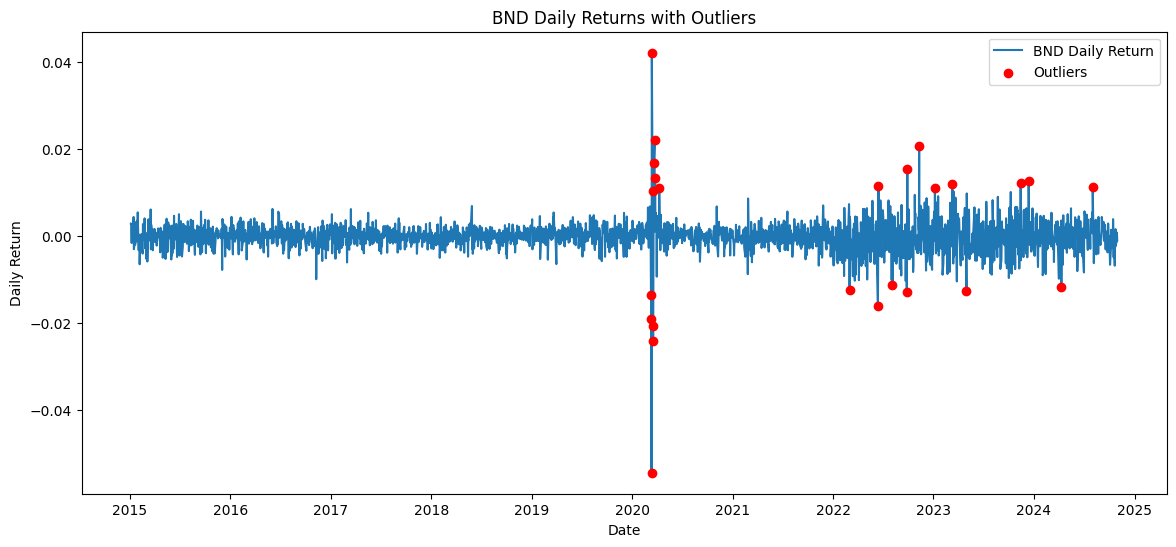

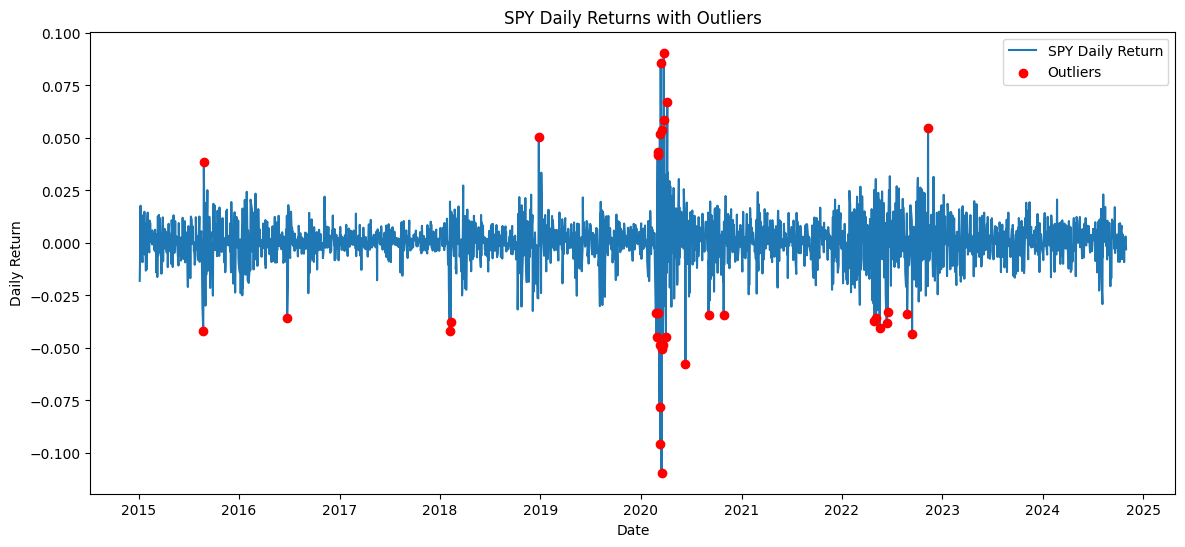

In [14]:
# Detect and plot outliers in daily returns
processor.plot_outliers()

##### Seasonality and Trends

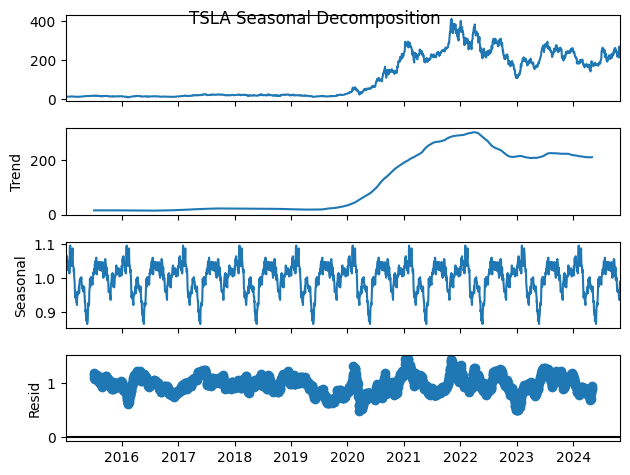

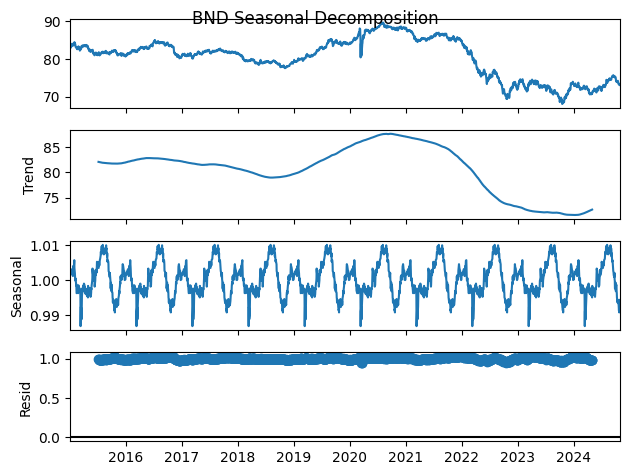

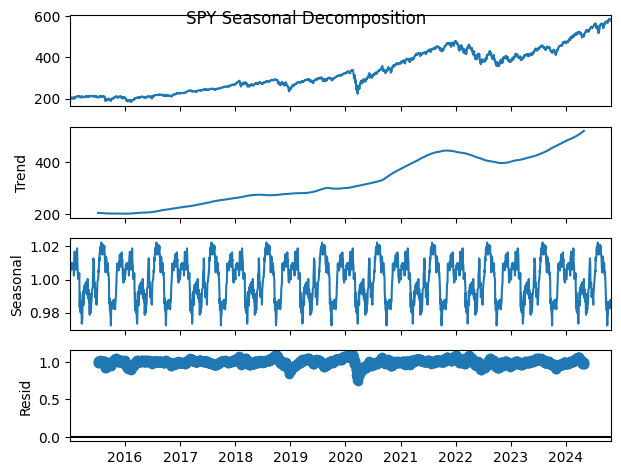

In [15]:
# Decompose time series
decomposition_results = processor.decompose_time_series()

In [17]:
# Calculate risk metrics (VaR and Sharpe Ratio)
risk_metrics = processor.calculate_risk_metrics()
for symbol, metrics in risk_metrics.items():
    print(f"\n{symbol} - Value at Risk (VaR): {metrics['VaR']:.4f}, Sharpe Ratio: {metrics['Sharpe Ratio']:.4f}")


TSLA - Value at Risk (VaR): -0.0513, Sharpe Ratio: 0.7977

BND - Value at Risk (VaR): -0.0051, Sharpe Ratio: -0.2014

SPY - Value at Risk (VaR): -0.0168, Sharpe Ratio: 0.6851


**Interpretation**:
- **VaR**: A lower VaR indicates a lower potential loss for a given confidence level.
- **Sharpe Ratio**: A higher Sharpe Ratio indicates a better risk-adjusted return.

**Based on these results**:
- **TSLA** has a higher potential loss (VaR) compared to BND and SPY, but also a higher Sharpe Ratio, suggesting better risk-adjusted returns.
- **BND** has the lowest potential loss (VaR) but also a negative Sharpe Ratio, indicating that its risk exceeds its returns.
- **SPY** has a moderate potential loss (VaR) and a positive Sharpe Ratio, suggesting reasonable risk-adjusted returns.